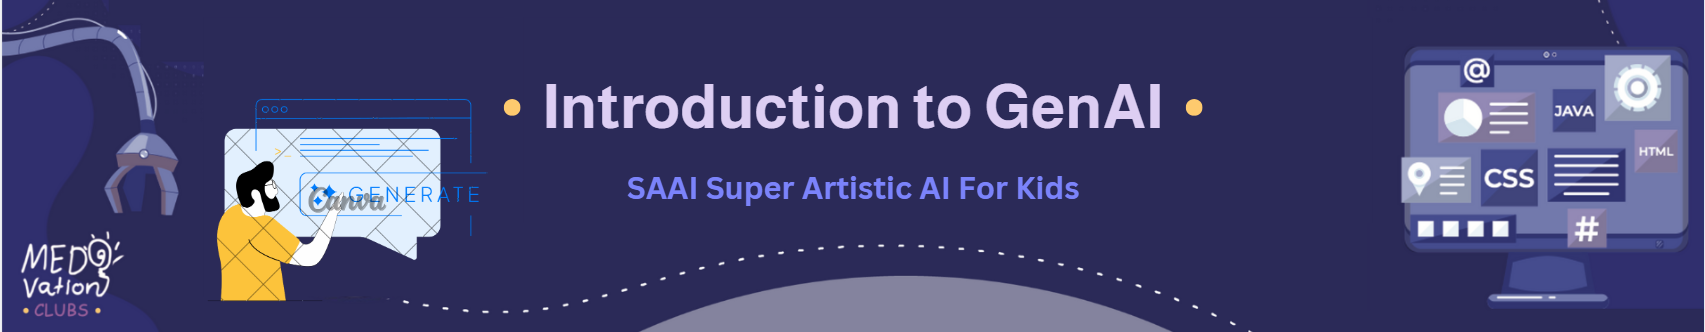

# **Audio Modality AI Lab: From Audio to Everything!**

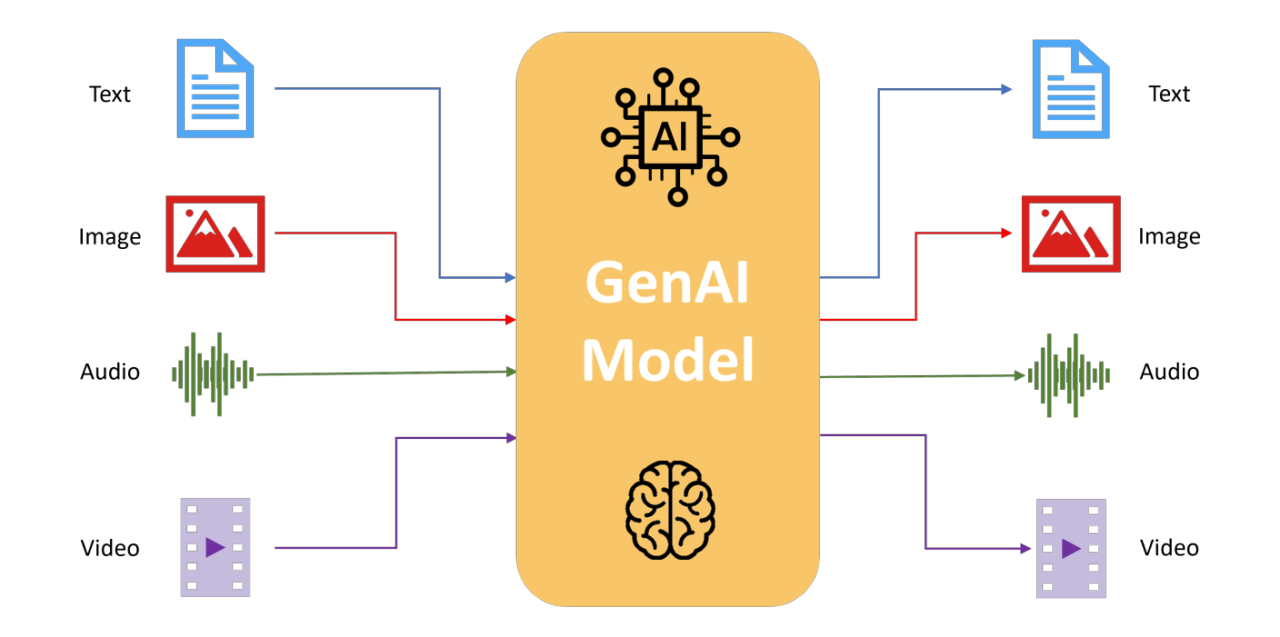

Image Source: https://www.linkedin.com/pulse/multimodal-generative-ai-tarun-sharma-zzf9c/

# Understanding the models in today's Lab:


## **1️. Whisper (Audio-to-Text) :**
### **Input:**  Takes an audio file (e.g., "A recorded lecture or a spoken conversation.").
### **How It Works:**

### 1️.  Audio Processing:

- The input audio is loaded and converted into a numerical format.
- It removes background noise and normalizes speech for better recognition.

### 2️.  Speech Recognition & Tokenization:

- The audio is segmented into smaller parts using a deep learning-based speech-to-text model.
- Each segment is analyzed and converted into text using a large-scale transformer model trained on multiple languages.

### 3️. Text Reconstruction:

- The model aligns and merges the transcribed text segments.

- It adjusts punctuation, grammar, and sentence structure for improved readability.

### **Output**: A natural language transcript of the speech, accurately converting spoken words into text.
---

## **2️. Stable Diffusion (Audio-to-Image)**:
### **Input:** Takes a transcribed text from an audio file and generates an image (e.g., "A serene landscape with mountains and a flowing river.").

### **How It Works:**

### 1️. Text Processing & Prompt Generation:

- The speech-to-text model (Whisper) first extracts meaningful text from the audio.
- The transcribed text is refined into a detailed prompt for image generation.

### 2️.  Diffusion Process & Image Generation::

- The model begins with random noise and gradually refines it using the diffusion process.

- Patterns, colors, and objects in the generated image align with the input text description.


### 3️.  Style Adaptation:

- Select different styles (e.g., "oil painting, watercolor, digital art") for personalized outputs.
- The AI adapts the generated image to match the requested artistic style.


### **Output:** A high-quality image based on the transcribed audio content and chosen artistic style.

---
# **3️. Damo-Vilab Text-to-Video Model (Video)**
### **Input:** Takes a transcribed speech description and generates a video (e.g., "A futuristic city with flying cars and glowing neon lights.").

### **How It Works:**
### 1️. Speech-to-Text Transcription:

- The audio is transcribed using Whisper, capturing key spoken details.
- This ensures the generated video aligns with the original spoken content.

### 2️. Text Embedding & Scene Understanding:
- The transcribed text is converted into embeddings that capture objects, actions, and settings.
- These embeddings provide context for generating video sequences.


### 3️. Key Frame Generation & Motion Interpolation:
- The AI creates key frames—still images representing critical moments in the video.
- It predicts movement between frames, adding smooth animations and transitions.


### 4. Diffusion-Based Enhancement:
- Just like Stable Diffusion for images, the AI gradually improves textures, sharpness, and motion quality.
- It ensures the video maintains high visual fidelity and consistency.


### **Output:** A visually rich video with smooth animations, closely aligned with the original speech description.

In [ ]:
!pip install torch torchaudio transformers diffusers soundfile librosa
!pip install ipywidgets pillow
!pip install imageio imageio-ffmpeg moviepy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import torch
from transformers import pipeline, AutoProcessor, AutoModelForSpeechSeq2Seq
from diffusers import StableDiffusionPipeline
from diffusers import DiffusionPipeline
import soundfile as sf
import librosa
import numpy as np
from IPython.display import display, Audio, Image, HTML
import ipywidgets as widgets
from moviepy.editor import VideoFileClip, AudioFileClip
import imageio
import traceback
import io
import os
import tempfile
import base64
import warnings
warnings.filterwarnings('ignore')

  if event.key is 'enter':



##  **1.Audio to text**

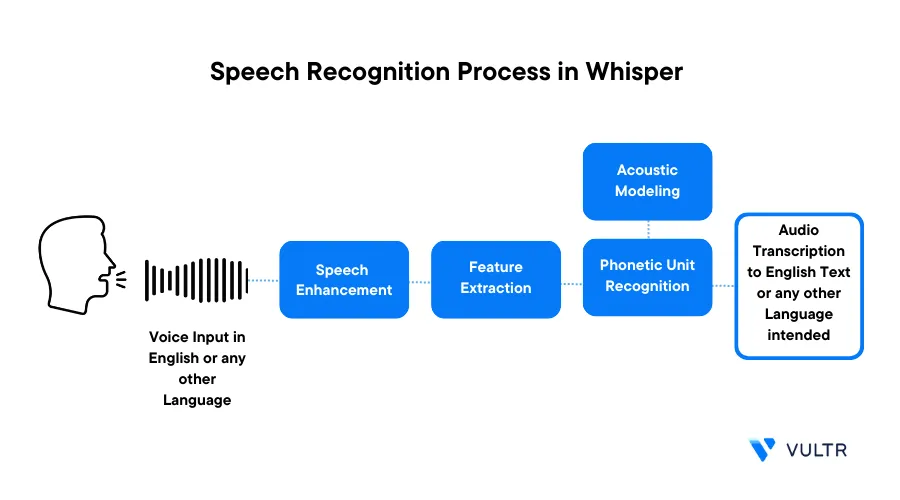

Image Source: https://docs.vultr.com/how-to-build-an-automatic-speech-recognition-system-on-vultr-cloud-gpu

In [ ]:
def create_audio_to_text():
    """Create interface for audio-to-text conversion"""
    output = widgets.Output()

    # Title and description
    title = widgets.HTML(value="<h2>🎤 Audio to Text Converter</h2>")
    description = widgets.HTML(
        value="""
        <p>Upload an audio file and I'll transcribe it!</p>
        <p style='color: #666; font-size: 0.9em;'>
            Supported formats: .mp3, .wav, .m4a, .aac
        </p>
        """
    )

    # File upload
    uploader = widgets.FileUpload(
        description='Upload Audio',
        accept='.mp3,.wav,.m4a,.aac',
        multiple=False,
        layout=widgets.Layout(width='300px')
    )

    # Buttons
    transcribe_button = widgets.Button(
        description='Transcribe',
        button_style='success',
        icon='microphone',
        disabled=True
    )

    try_another = widgets.Button(
        description='Try Another',
        button_style='info',
        icon='refresh'
    )

    def transcribe_audio(audio_data):
        """Transcribe audio using Whisper"""
        try:
            print("🎵 Loading audio...")
            file_info = next(iter(audio_data.values()))

            with tempfile.NamedTemporaryFile(suffix='.wav', delete=False) as tmp_file:
                tmp_file.write(file_info['content'])
                tmp_file.flush()

                print("🎤 Transcribing...")
                pipe = pipeline("automatic-speech-recognition",
                              model="openai/whisper-base")
                result = pipe(tmp_file.name)

                return result["text"]

        except Exception as e:
            print(f"❌ Error transcribing audio: {str(e)}")
            return None

    def on_transcribe_clicked(b):
        with output:
            output.clear_output()
            if uploader.value:
                try:
                    # Display audio player
                    audio_data = next(iter(uploader.value.values()))['content']
                    display(Audio(audio_data, autoplay=False))

                    # Transcribe
                    text = transcribe_audio(uploader.value)
                    if text:
                        print("\n📝 Transcription:")
                        print(text)

                except Exception as e:
                    print(f"❌ Error: {str(e)}")

    def on_try_another_clicked(b):
        with output:
            output.clear_output()
            uploader.value.clear()
            uploader._counter = 0
            transcribe_button.disabled = True
            print("Ready for another audio file!")

    def on_upload_change(change):
        if change['type'] == 'change' and change['name'] == 'value':
            transcribe_button.disabled = False

    # Register callbacks
    uploader.observe(on_upload_change)
    transcribe_button.on_click(on_transcribe_clicked)
    try_another.on_click(on_try_another_clicked)

    # Create layout
    display(widgets.VBox([
        title,
        description,
        uploader,
        widgets.HBox([transcribe_button, try_another]),
        output
    ], layout=widgets.Layout(padding='20px')))

create_audio_to_text()

In [ ]:
create_audio_to_text()

# **2. Audio to image**

In [ ]:
def create_audio_to_image_interface():
    """Create interface for audio to image conversion"""
    # Create widgets
    output = widgets.Output()

    # Title and description
    title = widgets.HTML(value="<h2>🎵 Audio to Image Generator</h2>")
    description = widgets.HTML(
        value="<p>Upload an audio file and I'll create an image based on what's being said!</p>"
    )

    # File upload
    uploader = widgets.FileUpload(
        description='Upload Audio',
        accept='.mp3,.wav,.m4a,.aac',
        multiple=False,
        layout=widgets.Layout(width='300px')
    )

    # Style dropdown
    style_dropdown = widgets.Dropdown(
        options=[
            'Digital Art',
            'Oil Painting',
            'Photorealistic',
            'Watercolor',
            'Anime Style',
            'Abstract Art'
        ],
        value='Digital Art',
        description='Style:',
        style={'description_width': 'initial'}
    )

    # Buttons
    generate_button = widgets.Button(
        description='Generate Image',
        button_style='success',
        icon='palette',
        disabled=True
    )

    try_another = widgets.Button(
        description='Try Another',
        button_style='info',
        icon='refresh'
    )

    status = widgets.HTML(value="")

    def update_status(message, error=False):
        color = '#dc3545' if error else '#28a745'
        status.value = f"<p style='color: {color};'>{message}</p>"

    def on_generate_clicked(b):
        with output:
            output.clear_output()
            if uploader.value:
                try:
                    # Show original audio
                    audio_data = next(iter(uploader.value.values()))
                    display(Audio(audio_data['content'], autoplay=False))

                    # Transcribe audio
                    print("🎤 Transcribing audio...")
                    transcriber = pipeline("automatic-speech-recognition",
                                        model="openai/whisper-base")

                    with tempfile.NamedTemporaryFile(suffix='.wav', delete=False) as tmp_file:
                        tmp_file.write(audio_data['content'])
                        tmp_file.flush()

                        # Get transcription
                        result = transcriber(tmp_file.name)
                        text = result["text"]
                        print(f"\n📝 Transcribed text: {text}")

                    # Generate image
                    print("\n🎨 Generating image...")
                    pipe = StableDiffusionPipeline.from_pretrained(
                        "runwayml/stable-diffusion-v1-5",
                        torch_dtype=torch.float16
                    ).to("cuda")

                    # Create prompt with style
                    prompt = f"A {style_dropdown.value.lower()} showing {text}"
                    print(f"\n✨ Prompt: {prompt}")

                    # Generate image
                    image = pipe(
                        prompt,
                        num_inference_steps=50,
                        guidance_scale=7.5
                    ).images[0]

                    display(image)
                    update_status("Image generated successfully!")

                except Exception as e:
                    print(f"❌ Error: {str(e)}")
                    update_status(f"Error: {str(e)}", True)

    def on_try_another_clicked(b):
        with output:
            output.clear_output()
            uploader.value.clear()
            uploader._counter = 0
            generate_button.disabled = True
            update_status("Ready for another audio file!")

    def on_upload_change(change):
        if change['type'] == 'change' and change['name'] == 'value':
            generate_button.disabled = False
            update_status("Audio file ready! Click 'Generate Image' to continue.")

    # Register callbacks
    uploader.observe(on_upload_change)
    generate_button.on_click(on_generate_clicked)
    try_another.on_click(on_try_another_clicked)

    # Create layout
    controls = widgets.VBox([
        title,
        description,
        uploader,
        style_dropdown,
        widgets.HBox([generate_button, try_another],
                    layout=widgets.Layout(justify_content='center')),
        status,
        output
    ], layout=widgets.Layout(
        padding='20px',
        align_items='center'
    ))

    display(controls)

create_audio_to_image_interface()

In [ ]:
create_audio_to_image_interface()

In [ ]:
create_audio_to_image_interface()

##  **3. Audio to video**

In [ ]:
def check_audio_file(file_info):
    """Check if the audio file is valid and supported"""
    try:
        filename = file_info['metadata']['name']
        content = file_info['content']

        # Check file extension
        ext = os.path.splitext(filename)[1].lower()
        if ext not in ['.mp3', '.wav', '.m4a', '.aac']:
            raise ValueError(f"Unsupported file format: {ext}")

        # Create a temporary file to test loading
        with tempfile.NamedTemporaryFile(suffix=ext, delete=False) as tmp_file:
            tmp_file.write(content)
            tmp_file.flush()

            # Try to load the file
            y, sr = librosa.load(tmp_file.name)
            os.unlink(tmp_file.name)

            return True
    except Exception as e:
        print(f"❌ Error checking audio file: {str(e)}")
        return False

def process_frames(frames):
    """Process frames to ensure correct format"""
    try:
        processed_frames = []

        # Handle 5D tensor (batch, num_frames, height, width, channels)
        if len(frames.shape) == 5:
            frames = frames[0]  # Remove batch dimension

        # Now frames should be (num_frames, height, width, channels)
        for i in range(frames.shape[0]):
            frame = frames[i]

            # Ensure frame is in correct format
            if isinstance(frame, torch.Tensor):
                frame = frame.cpu().numpy()

            # Normalize if needed
            if frame.max() <= 1.0:
                frame = (frame * 255).clip(0, 255)

            # Convert to uint8
            frame = frame.astype(np.uint8)

            # Ensure RGB format
            if len(frame.shape) == 2:
                frame = np.stack([frame] * 3, axis=-1)
            elif frame.shape[-1] == 4:
                frame = frame[..., :3]

            # Add frame to processed list
            processed_frames.append(frame)

        print(f"Processed {len(processed_frames)} frames successfully")
        return processed_frames

    except Exception as e:
        print(f"❌ Error processing frames: {str(e)}")
        raise


def create_video_from_speech(audio_data):
    """Create a video based on speech content using text-to-video generation"""
    try:
        print("🎵 Loading audio file...")
        file_info = next(iter(audio_data.values()))
        content = file_info['content']

        # Create progress bar
        progress = widgets.IntProgress(
            value=0,
            min=0,
            max=100,
            description='Progress:',
            style={'description_width': 'initial'}
        )
        display(progress)

        # Process audio
        with tempfile.NamedTemporaryFile(suffix='.wav', delete=False) as tmp_audio:
            tmp_audio.write(content)
            tmp_audio.flush()
            progress.value = 10

            # Load audio
            y, sr = librosa.load(tmp_audio.name)
            progress.value = 20

            print("🎤 Recognizing speech...")
            transcriber = pipeline("automatic-speech-recognition",
                                 model="openai/whisper-base")

            transcription = transcriber(tmp_audio.name)
            text = transcription["text"]
            print(f"📝 Transcribed text: {text}")
            progress.value = 40

            print("🎬 Generating video from text...")
            pipe = DiffusionPipeline.from_pretrained(
                "damo-vilab/text-to-video-ms-1.7b",
                torch_dtype=torch.float16,
                variant="fp16"
            ).to("cuda")

            # Enable optimizations
            pipe.enable_model_cpu_offload()
            pipe.enable_vae_slicing()
            progress.value = 60

            # Generate video frames
            result = pipe(
                text,
                num_inference_steps=30,
                num_frames=16,
                height=320,
                width=576
            )

            progress.value = 80

            # Get frames and print shape information
            frames = np.array(result.frames)
            print(f"Generated frames shape: {frames.shape}")

            # Process frames
            processed_frames = process_frames(frames)
            print(f"Number of processed frames: {len(processed_frames)}")
            if len(processed_frames) > 0:
                print(f"Frame shape: {processed_frames[0].shape}")

            progress.value = 100

            os.unlink(tmp_audio.name)
            return processed_frames, y, sr

    except Exception as e:
        print(f"❌ Error creating video: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None, None

def save_and_display_video(frames, audio, sr):
    """Save and display the video with audio"""
    try:
        print("\n💾 Saving video...")
        with tempfile.NamedTemporaryFile(suffix='.mp4', delete=False) as tmp_video, \
             tempfile.NamedTemporaryFile(suffix='.wav', delete=False) as tmp_audio:

            # Save audio
            sf.write(tmp_audio.name, audio, sr)

            # Save frames as video
            writer = imageio.get_writer(
                tmp_video.name,
                fps=8,
                macro_block_size=1,
                quality=8
            )

            print(f"Saving {len(frames)} frames...")
            for frame in frames:
                writer.append_data(frame)
            writer.close()

            # Combine video and audio
            video = VideoFileClip(tmp_video.name)
            audio = AudioFileClip(tmp_audio.name)

            # Loop video to match audio duration
            video = video.loop(duration=audio.duration)
            final = video.set_audio(audio)

            # Save final video
            output_path = tmp_video.name + '_final.mp4'
            final.write_videofile(
                output_path,
                codec='libx264',
                audio_codec='aac',
                fps=8,
                verbose=False
            )

            # Read and encode for display
            with open(output_path, 'rb') as f:
                video_base64 = base64.b64encode(f.read()).decode()

            # Clean up
            os.unlink(tmp_video.name)
            os.unlink(tmp_audio.name)
            os.unlink(output_path)
            video.close()
            audio.close()
            final.close()

            video_html = f"""
            <div style="display: flex; justify-content: center; margin: 20px 0;">
                <video style="max-width: 100%; height: auto;" controls autoplay loop>
                    <source src="data:video/mp4;base64,{video_base64}" type="video/mp4">
                </video>
            </div>
            """

            return HTML(video_html)

    except Exception as e:
        print(f"❌ Error saving video: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

def create_audio_visualizer():
    """Create the main interface for audio-to-video conversion"""
    # Create widgets
    output = widgets.Output()

    # Title and description
    title = widgets.HTML(value="<h2>🎵 Audio Visualizer</h2>")
    description = widgets.HTML(
        value="""
        <p>Upload an audio file to create a beautiful visualization!</p>
        <p style='color: #666; font-size: 0.9em;'>
            Supported formats: .mp3, .wav, .m4a, .aac
        </p>
        """
    )

    # File upload with clearer description
    uploader = widgets.FileUpload(
        description='Upload Audio',
        accept='.mp3,.wav,.m4a,.aac',
        multiple=False,
        layout=widgets.Layout(width='300px')
    )

    # Visualization control
    fps_slider = widgets.IntSlider(
        value=30,
        min=15,
        max=60,
        description='FPS:',
        style={'description_width': 'initial'},
        tooltip='Frames per second in the generated video'
    )

    # Buttons
    generate_button = widgets.Button(
        description='Generate Video',
        button_style='success',
        icon='play',
        disabled=True,
        tooltip='Create visualization from audio'
    )

    try_another = widgets.Button(
        description='Try Another',
        button_style='info',
        icon='refresh',
        tooltip='Clear and start over'
    )

    status_label = widgets.HTML(value="")

    def update_status(message, error=False):
        """Update status message"""
        color = '#dc3545' if error else '#28a745'
        status_label.value = f"<p style='color: {color};'>{message}</p>"

    def on_upload_change(change):
        if change['type'] == 'change' and change['name'] == 'value':
            with output:
                output.clear_output()
                print("✅ Audio file uploaded!")
                update_status("Audio file ready! Click 'Generate Video' to continue.")
                generate_button.disabled = False

    def on_generate_clicked(b):
      with output:
        output.clear_output()
        update_status("Starting visualization...")
        try:
            if uploader.value:
                frames, audio, sr = create_video_from_speech(uploader.value)
                if frames is not None:
                    video = save_and_display_video(frames, audio, sr)
                    if video is not None:
                        display(video)
                        update_status("Video created successfully!")
            else:
                update_status("Please upload an audio file first!", True)
        except Exception as e:
            update_status(f"Error: {str(e)}", True)

    def on_try_another_clicked(b):
        with output:
            output.clear_output()
            uploader.value.clear()
            uploader._counter = 0
            generate_button.disabled = True
            update_status("Ready for a new audio file!")

    # Register callbacks
    uploader.observe(on_upload_change)
    generate_button.on_click(on_generate_clicked)
    try_another.on_click(on_try_another_clicked)

    # Create layout
    controls = widgets.VBox([
        title,
        description,
        uploader,
        fps_slider,
        widgets.HBox([generate_button, try_another],
                    layout=widgets.Layout(justify_content='center')),
        status_label,
        output
    ], layout=widgets.Layout(
        padding='20px',
        align_items='center'
    ))

    display(controls)

# Run the interface
create_audio_visualizer()

In [ ]:
create_audio_visualizer()